In [1]:
# Import Library 
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# Dataset path
test_path = '/home/artpark/personal project/Face Mask Detection/data/test/'
train_path = '/home/artpark/personal project/Face Mask Detection/data/train/'

In [78]:
os.listdir(test_path)

['NoMask', 'Mask']

In [79]:
os.listdir(train_path)

['NoMask', 'Mask']

Text(0.5, 1.0, 'With Mask')

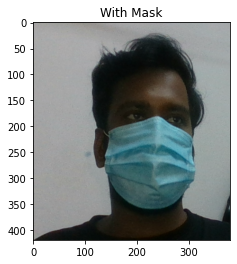

In [83]:
v = test_path + 'Mask'
#os.listdir(v)
img_path = v + '/image1_134.png'
img_r = plt.imread(img_path)
plt.imshow(img_r)
plt.title('With Mask')

Text(0.5, 1.0, 'Without Mask')

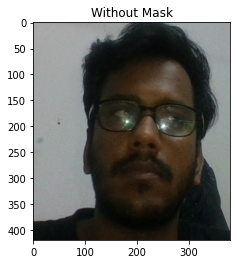

In [82]:
v = test_path + 'NoMask'
#os.listdir(v)
img_path = v + '/image3_27.png'
img_r = plt.imread(img_path)
plt.imshow(img_r)
plt.title('Without Mask')

In [69]:
# Check for average dim of image in dataset
dim1 = []
dim2 = []
for image in os.listdir(test_path + 'Mask'):
    pic = plt.imread(test_path + 'Mask/' + image)
#     print(pic.shape)
    d1, d2, c = pic.shape
    dim1.append(d1)
    dim2.append(d2)

In [7]:
np.mean(dim1)

390.4142857142857

In [8]:
np.mean(dim2)

532.6023809523809

In [9]:
# Set image shape
image_shape = (370, 430, 3)
batch_size = 16

In [10]:
# pre-processing of dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range = 10, 
                              width_shift_range = 0.10,
                              height_shift_range = 0.10,
                              rescale = 1/255,
                              shear_range = 0.1,
                              zoom_range = 0.05,
                              horizontal_flip = True,
                              fill_mode = 'nearest')

In [11]:
# Create Train - Test generator, which will used to train the model
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

test_image_gen = image_gen.flow_from_directory(test_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=False)

Found 4286 images belonging to 2 classes.
Found 835 images belonging to 2 classes.


In [12]:
#check
train_image_gen.class_indices

{'Mask': 0, 'NoMask': 1}

In [13]:
# Start Creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

In [70]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape = image_shape, activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 368, 428, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 184, 214, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 182, 212, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 91, 106, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 89, 104, 64)       36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 44, 52, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 42, 50, 32)        1

In [16]:
# Apply early stopping criteria
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [17]:
model.fit(train_image_gen, epochs=50, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/50


2022-01-04 18:08:05.449010: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


 86/268 [========>.....................] - ETA: 57s - loss: 0.5056 - accuracy: 0.7275

/home/artpark/anaconda3/envs/tf/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


268/268 [==============================] - 108s 391ms/step - loss: 0.3019 - accuracy: 0.8712 - val_loss: 0.4625 - val_accuracy: 0.8431
Epoch 2/50
268/268 [==============================] - 105s 390ms/step - loss: 0.1763 - accuracy: 0.9475 - val_loss: 0.4587 - val_accuracy: 0.8323
Epoch 3/50
268/268 [==============================] - 106s 394ms/step - loss: 0.1384 - accuracy: 0.9573 - val_loss: 0.5106 - val_accuracy: 0.8635
Epoch 4/50
268/268 [==============================] - 103s 386ms/step - loss: 0.1320 - accuracy: 0.9631 - val_loss: 0.4088 - val_accuracy: 0.8539
Epoch 5/50
268/268 [==============================] - 104s 389ms/step - loss: 0.1233 - accuracy: 0.9617 - val_loss: 0.7898 - val_accuracy: 0.7497
Epoch 6/50
268/268 [==============================] - 104s 389ms/step - loss: 0.1173 - accuracy: 0.9648 - val_loss: 1.1426 - val_accuracy: 0.7617
Epoch 7/50
268/268 [==============================] - 109s 407ms/step - loss: 0.1132 - accuracy: 0.9671 - val_loss: 0.5130 - val_accura

In [18]:
model.save('FaceMaskDetection4.h5')

<AxesSubplot:>

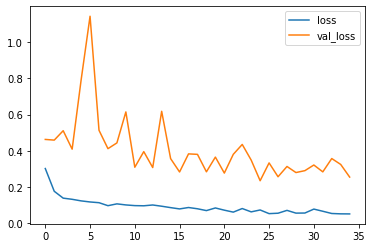

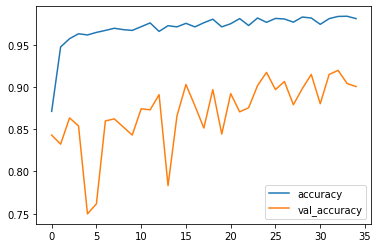

In [19]:
loss = pd.DataFrame(model.history.history)
loss[['loss', 'val_loss']].plot()
loss[['accuracy', 'val_accuracy']].plot()

In [74]:
model.evaluate_generator(test_image_gen)

In [76]:
predd = model.predict_generator(test_image_gen)

In [71]:
#predd

In [23]:
prediction = predd > 0.5

In [72]:
#prediction

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test_image_gen.classes, prediction))
print('*****************************************************')
print(classification_report(test_image_gen.classes, prediction))

[[397  23]
 [ 50 365]]
*****************************************************
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       420
           1       0.94      0.88      0.91       415

    accuracy                           0.91       835
   macro avg       0.91      0.91      0.91       835
weighted avg       0.91      0.91      0.91       835



In [ ]:
######################################################################################
############## Load saved Model    ###################################################
######################################################################################

In [66]:
from tensorflow.keras.models import load_model
import cv2
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from tensorflow.keras.preprocessing import image

In [67]:
new_model = load_model('FaceMaskDetection4.h5')

In [ ]:
image_shape = (370, 430, 3)
image2 = image.load_img('with_mask271.jpg', target_size=image_shape[:2])
my_img_arr = image.img_to_array(image2)             #check my_img_arr.shape should be ---> (370, 430, 3)
# print(my_img_arr.shape)
my_img_arr = np.expand_dims(my_img_arr, axis = 0)   #check my_img_arr.shape should be ---> (1, 370, 430, 3)
print(my_img_arr.shape)
predd = new_model.predict(my_img_arr)